In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
img = cv2.imread('images/me.jpg')

In [19]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

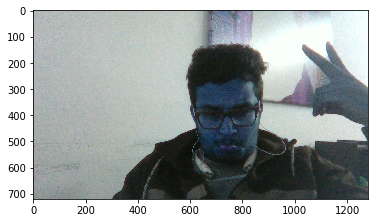

In [20]:
plt.imshow(img, cmap='gray')

In [21]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [22]:
classes = []
with open('coco.names', 'r') as f:
       # print(f.readlines())
    classes = [line.strip() for line in f.readlines()]


In [23]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [24]:
layer_names = net.getLayerNames()

In [25]:
layer_names

['conv_0',
 'bn_0',
 'relu_0',
 'conv_1',
 'bn_1',
 'relu_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'conv_3',
 'bn_3',
 'relu_3',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'conv_7',
 'bn_7',
 'relu_7',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_16',
 'conv_17',
 'bn_17',
 'relu_17',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_19',
 'conv_20',
 'bn_20',
 'relu_20',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_22',
 'conv_23',
 'bn_23',
 'relu_23',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_25',
 'conv_26',
 'bn_26',
 'relu_26',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_28',
 'conv_29',
 'bn_29',
 'relu_29',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_31',
 'conv_32',
 'bn_32',
 'relu_32',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_34',
 'conv_35',
 'bn

In [26]:
output_layer =[layer_names[i[0] -1] for i in net.getUnconnectedOutLayers()]

In [27]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [28]:
height, width = gray_img.shape

In [29]:
blob = cv2.dnn.blobFromImage(img, 0.0003, (512, 512), (0, 0, 0), True)

In [30]:
net.setInput(blob)
outs = net.forward(output_layer)

In [31]:
len(outs) #what are these 3 layers representing?? know about that??/

3

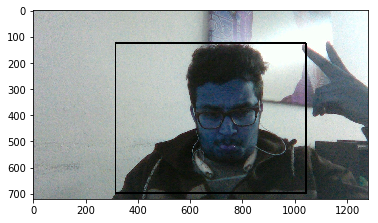

In [32]:
class_ids = []
boxes = []
confidences = []
for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
    
        if confidence > 0.4:
            cx = int(det[0]*width)
            cy = int(det[1]*height)

            w = int(det[2]*width)
            h = int(det[3]*height)

            x, y = int(cx - w/2), int(cy - h/2)
            boxes.append([x, y, w, h])
            confidences.append(confidence)
            class_ids.append(class_id)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 5)
    plt.imshow(img)